In [1]:
import numpy as np
import pandas as pd

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [3]:
#print(airlines.head(10))
#print(airports.head(10))
print(train.head(10))
#print(test.head(10))
#submit_sample.head(10)

   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   1  2015      1    1            4      AA           2336      N3KUAA   
2   2  2015      1    1            4      US            840      N171US   
3   3  2015      1    1            4      AA            258      N3HYAA   
4   4  2015      1    1            4      AS            135      N527AS   
5   5  2015      1    1            4      DL            806      N3730B   
6   6  2015      1    1            4      NK            612      N635NK   
7   7  2015      1    1            4      US           2013      N584UW   
8   8  2015      1    1            4      AA           1112      N3LAAA   
9   9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX    

In [4]:
airlines.describe(include='all')
airports.describe(include='all')
train.describe(include='all')

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818553e+06,2818553.0,2.818553e+06,2.818553e+06,2.818553e+06,2818553,2.818553e+06,2818553,2818553,2818553,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
unique,NaN,NaN,NaN,NaN,NaN,14,NaN,4688,322,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,N477HA,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,610684,NaN,2024,183656,183537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.409276e+06,2015.0,3.573126e+00,1.562678e+01,3.938906e+00,NaN,2.192953e+03,NaN,NaN,NaN,1.329533e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.001171e+00
std,8.136463e+05,0.0,1.703931e+00,8.704137e+00,1.986157e+00,NaN,1.774639e+03,NaN,NaN,NaN,4.814211e+02,4.950658e+02,9.226391e+00,4.964894e+02,7.501261e+01,6.033737e+02,5.036512e+02,4.065076e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046380e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,7.330000e+02,NaN,NaN,NaN,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,1.673000e+03,NaN,NaN,NaN,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,NaN,3.354000e+03,NaN,NaN,NaN,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01


In [5]:
Q1 = train.ARRIVAL_DELAY.quantile(.25)
Q3 = train.ARRIVAL_DELAY.quantile(.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR # lower bound for data to not be considered as outliers
UB = Q3 + 1.5*IQR # upper bound
train_out = train[(train.ARRIVAL_DELAY > LB) & (train.ARRIVAL_DELAY < UB)]
train_out # training set without outliers

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [6]:
# create departure and scheduled departure times as minutes (from 0 to 1440)
dep = (train_out.DEPARTURE_TIME-train_out.DEPARTURE_TIME%100)*60/100 + train_out.DEPARTURE_TIME%100
sch = (train_out.SCHEDULED_DEPARTURE-train_out.SCHEDULED_DEPARTURE%100)*60/100 + train_out.SCHEDULED_DEPARTURE%100

# the difference 
dif = pd.DataFrame(dep - sch)
dif

,0
0,1429.0
1,-8.0
2,-2.0
3,-5.0
4,-1.0
...,...
2818546,-4.0
2818547,-7.0
2818548,-1.0
2818551,-1427.0


In [7]:
dif[abs(dif) < 720].describe(include='all')

,0
count,2.570459e+06
mean,1.914960e+00
std,1.206500e+01
min,-4.800000e+01
25%,-5.000000e+00
50%,-2.000000e+00
75%,4.000000e+00
max,1.330000e+02


In [8]:
abs(dif[abs(dif) > 720]).describe(include='all')

,0
count,2179.000000
mean,1416.391005
std,16.471486
min,1340.000000
25%,1405.000000
50%,1420.000000
75%,1430.000000
max,1438.000000


In [9]:
# we see that unless the scheduled and actual departure times differ by day, the min differnce is -48 and max is 133
# let's convert values above 720 minutes and add a DEPARTURE_DELAY column

def dep_del(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_dep = dep_del(train_out)
train_dep

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0,-4.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0,-7.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [10]:
train_dep.iloc[:,-2:].corr()
# departure delay and arrival delay are apparently rather strongly correlated at 0.680

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.000000,0.679894
DEPARTURE_DELAY,0.679894,1.000000


In [11]:
# REMARK:
# We can maybe extend the outliers until the maximum difference between the scheduled and the actual departure for a
# flight in one day gets as close as possible to the minimum difference where the scheduled flight is on one day and
# the actual flight is on another

# But I'm not sure how we will know if the data we have is in one of them or the other

In [12]:
train_d = dep_del(train)
train_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [13]:
train_d.iloc[:,-2:].corr()

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.00000,0.82973
DEPARTURE_DELAY,0.82973,1.00000


In [14]:
test_d = dep_del(test)
test_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = train_d["DEPARTURE_DELAY"].values
Y = train_d["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit0 = test_d['DEPARTURE_DELAY'].values

yfit0 = model.predict(xfit0[:, np.newaxis])
yfit0

array([31.68050967, -7.83519   , -7.83519   , ..., -6.91622024,
        1.3545076 , -5.07828072])

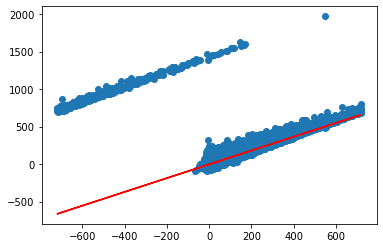

In [16]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit0, yfit0, c='r')

In [18]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY'])

,ARRIVAL_DELAY
0,31.680510
1,-7.835190
2,-7.835190
3,40.870207
4,5.030387
...,...
514379,-5.997250
514380,8.706266
514381,-6.916220
514382,1.354508


In [20]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY']).to_csv('submit_sample1.csv', index_label='id')

In [21]:
X = train_dep["DEPARTURE_DELAY"].values
Y = train_dep["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit1 = test_d['DEPARTURE_DELAY'].values

yfit1 = model.predict(xfit1[:, np.newaxis])
yfit1

array([27.95520224, -9.1921433 , -9.1921433 , ..., -8.32825155,
       -0.55322573, -6.60046803])

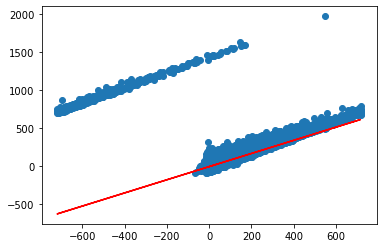

In [22]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit1, yfit1, c='r')

In [23]:
pd.DataFrame(yfit1, columns=['ARRIVAL_DELAY']).to_csv('submit_sample2.csv', index_label='id')

In [24]:
train[train.ARRIVAL_DELAY>1440]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
150600,150600,2015,1,11,7,AA,1595,N469AA,AUS,DFW,650,700.0,14.0,714.0,65.0,190,755,1444.0
258405,258405,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,16.0,1430.0,76.0,236,1246,1593.0
305007,305007,2015,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,14.0,1254.0,172.0,918,1415,1452.0
331026,331026,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,1608.0,13.0,1621.0,134.0,597,914,1971.0
387354,387354,2015,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,19.0,909.0,191.0,1313,1210,1546.0
572725,572725,2015,2,9,1,HA,51,N374HA,JFK,HNL,935,924.0,18.0,942.0,675.0,4983,1550,1467.0
769725,769725,2015,2,22,7,AA,1080,N007AA,EGE,ORD,1415,1432.0,22.0,1454.0,158.0,1007,1753,1460.0
853639,853639,2015,2,28,6,AA,1312,N028AA,STL,MIA,620,847.0,71.0,958.0,168.0,1068,1008,1627.0
911947,911947,2015,3,4,3,AA,270,N5DJAA,HNL,LAX,828,1057.0,23.0,1120.0,327.0,2556,1555,1576.0
1004129,1004129,2015,3,10,2,AA,1594,N598AA,SAT,DFW,850,1047.0,14.0,1101.0,70.0,247,1000,1554.0


In [25]:
train.ARRIVAL_DELAY.sort_values()

1420147     -87.0
1049837     -87.0
309817      -82.0
1783910     -81.0
542188      -79.0
            ...  
911947     1576.0
258405     1593.0
1232474    1598.0
853639     1627.0
331026     1971.0
Name: ARRIVAL_DELAY, Length: 2818553, dtype: float64

In [26]:
def dep_delay(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_delay = dep_delay(train)
train_delay

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


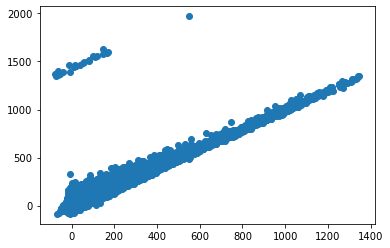

In [27]:
plt.scatter(train_delay.DEPARTURE_DELAY, train_delay.ARRIVAL_DELAY)

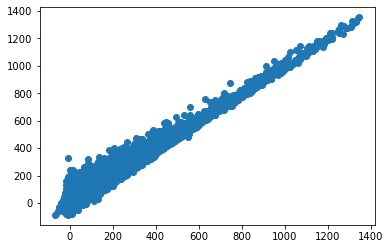

In [28]:
traindelay = train_delay[400 + train_delay.DEPARTURE_DELAY > train_delay.ARRIVAL_DELAY]
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)

In [36]:
test_del = dep_delay(test)
test_del

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [37]:
X = traindelay["DEPARTURE_DELAY"].values
Y = traindelay["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit2 = test_del['DEPARTURE_DELAY'].values

yfit2 = model.predict(xfit2[:, np.newaxis])
yfit2

array([33.92804172, -9.41850665, -9.41850665, ..., -8.41044739,
        0.66208599, -6.39432886])

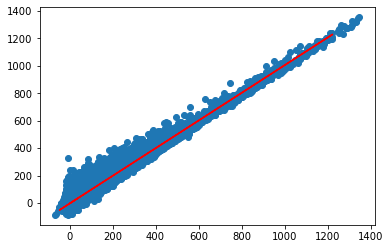

In [38]:
from matplotlib import pyplot as plt
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)
plt.plot(xfit2, yfit2, c='r')

In [39]:
pd.DataFrame(yfit2, columns=['ARRIVAL_DELAY']).to_csv('submit_sample3.csv', index_label='id')

In [48]:
test_d.DEPARTURE_DELAY.sort_values()

112784   -719.0
281955   -705.0
196836   -703.0
63874    -700.0
65733    -696.0
          ...  
250403    704.0
254574    706.0
114320    706.0
513632    714.0
344705    716.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

In [49]:
test_del.DEPARTURE_DELAY.sort_values()

282680     -47.0
244146     -41.0
60493      -40.0
328349     -39.0
363954     -37.0
           ...  
68566     1075.0
272476    1125.0
119316    1170.0
136518    1176.0
453217    1223.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

In [34]:
train.sort_values(by = 'AIRLINE').set_index(['AIRLINE','id'])

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER  \
AIRLINE id                                                                  
AA      723077   2015      2   19            4           1471      N555AA   
        1534538  2015      4   12            7           1112      N3KVAA   
        1135740  2015      3   18            3            172      N787AA   
        1135741  2015      3   18            3            259      N3KNAA   
        1135742  2015      3   18            3           1528      N485AA   
...               ...    ...  ...          ...            ...         ...   
WN      835428   2015      2   26            4           1066      N237WN   
        835427   2015      2   26            4            791      N7737E   
        835426   2015      2   26            4           1114      N8308K   
        835433   2015      2   26            4            327      N208WN   
        1409276  2015      4    4            6           2090      N557WN   

                ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
AIRLINE id                                                                
AA      723077             DEN                 DFW                 1016   
        1534538            DFW                 LGA                  855   
        1135740            LAX                 JFK                 1025   
        1135741            DFW                 SFO                 1025   
        1135742            DFW                 LAS                 1025   
...                        ...                 ...                  ...   
WN      835428             LAS                 RNO                 1935   
        835427             LAS                 OKC                 1935   
        835426             LAS                 OAK                 1935   
        835433             MDW                 TPA                 1935   
        1409276            IND                 RSW                  750   

                 DEPARTURE_TIME  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  \
AIRLINE id                                                              
AA      723077           1009.0      22.0      1031.0           120.0   
        1534538           855.0      13.0       908.0           211.0   
        1135740          1038.0      18.0      1056.0           334.0   
        1135741          1030.0      20.0      1050.0           235.0   
        1135742          1023.0      16.0      1039.0           180.0   
...                         ...       ...         ...             ...   
WN      835428           1941.0      13.0      1954.0            80.0   
        835427           1933.0      20.0      1953.0           140.0   
        835426           1930.0      12.0      1942.0            95.0   
        835433           1947.0       7.0      1954.0           160.0   
        1409276           747.0      15.0       802.0           155.0   

                 DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  
AIRLINE id                                                   
AA      723077        641               1316          -14.0  
        1534538      1389               1326          -11.0  
        1135740      2475               1859          -19.0  
        1135741      1464               1220          -18.0  
        1135742      1055               1125          -23.0  
...                   ...                ...            ...  
WN      835428        345               2055            5.0  
        835427        986               2355           -9.0  
        835426        407               2110          -12.0  
        835433        997               2315            0.0  
        1409276       945               1025          -24.0  

[2818553 rows x 16 columns]